# Interactias Network

One way of examining the impact of invasive species is to look at all their interactions and the interations those organisms have with each other. This full interaction network gives you a good idea whether a species might be a "keystone" species 

*"The concept of the "keystone species" is redefined to allow for the a priori prediction of these species within ecosystems. A keystone species is held to be a **strongly interacting species** whose top-down effect on species diversity and competition is large relative to its biomass dominance within a functional group."*

Davic, R. D. (2003). Linking keystone species and functional groups: a new operational definition of the keystone species concept. Conservation Ecology, 7(1).

I will harvest species interactions data from GLOBI (https://www.globalbioticinteractions.org/) to discover the species that interact with an invasive species. I will then harvest all the interactions for those species to create two tiers of interactions. I will then create a network diagram to visualize this.

This notebook takes considerable insperation and code from Yikang Li's project on GLoBI (https://curiositydata.org/part1_globi_access/).

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt

## Load the GLoBI data

The current snapshot of GLoBI was taken on 2019-11-05 from https://depot.globalbioticinteractions.org/snapshot/target/data/tsv/interactions.tsv.gz


In [3]:
# This takes a few minutes to load in.
# the low_memory=False property will get rid of a warning, but will not help if there is really no memory left
data = pd.read_csv('C://Users//quentin//Documents//interactias//interactias//data//interactions.tsv', delimiter='\t', encoding='utf-8', low_memory=False)
len(data)

3878740

In [4]:
# Take a little look at the data to make sure it makes sense
data.head()

,sourceTaxonId,sourceTaxonIds,sourceTaxonName,sourceTaxonRank,sourceTaxonPathNames,sourceTaxonPathIds,sourceTaxonPathRankNames,sourceTaxonSpeciesName,sourceTaxonSpeciesId,sourceTaxonGenusName,...,eventDateUnixEpoch,argumentTypeId,referenceCitation,referenceDoi,referenceUrl,sourceCitation,sourceNamespace,sourceArchiveURI,sourceDOI,sourceLastSeenAtUnixEpoch
0,EOL:12001247,EOL:12001247 | OTT:133330 | IRMNG:11733708 | N...,Leptoconchus massini,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus massini,EOL:12001247,Leptoconchus,...,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z
1,EOL:12001247,EOL:12001247 | OTT:133330 | IRMNG:11733708 | N...,Leptoconchus massini,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus massini,EOL:12001247,Leptoconchus,...,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z
2,EOL:12001243,EOL:12001243 | WD:Q13393577 | OTT:550603 | WOR...,Leptoconchus inpleuractis,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus inpleuractis,EOL:12001243,Leptoconchus,...,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z
3,EOL:12001243,EOL:12001243 | WD:Q13393577 | OTT:550603 | WOR...,Leptoconchus inpleuractis,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus inpleuractis,EOL:12001243,Leptoconchus,...,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z
4,EOL:12001243,EOL:12001243 | WD:Q13393577 | OTT:550603 | WOR...,Leptoconchus inpleuractis,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus inpleuractis,EOL:12001243,Leptoconchus,...,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z


## Drop duplicates

This line gets rid of duplicate interations. I currently can't see a reason to keep them, but this perhaps should be checked. 
Some more common interactions might have more support in the literature and therefore more records. Deduplicating them tends to equal out rare interactions with common ones.

In [5]:
data.drop_duplicates(['sourceTaxonName', 'interactionTypeName', 'targetTaxonName'], inplace = True)

In [6]:
## Check how many rows are left
len(data)

1103723

## Remove ranks that are not species
Many entries in GLoBI are non-specific interations at a high taxonomic level. For example, roses are visited by bees.
I have chossen to remove these interactions from the study, at least preliminarly

In [7]:
data.drop(data[data['sourceTaxonRank'] != 'species'].index, inplace = True)
data.drop(data[data['targetTaxonRank'] != 'species'].index, inplace = True)

In [8]:
## Check how many rows are left
len(data)

536018

## Remove "interactsWith"
There are many vague interactions with the term interactsWith. These aren't really that useful, because it could be any kind of interaction, positive or negative, direct or indirect.

In [9]:
data = data[data.interactionTypeName != 'interactsWith']

len(data)

394573

Define the key taxon for the notebook for which to find all interactions


In [213]:
#taxon = "Oxalis corniculata"
#taxon = "Oxalis pes-caprae"
#taxon = "Lantana camara"
#taxon = "Cirsium vulgare"
taxon = "Procyon lotor" # raccoon
#taxon = "Sciurus carolinensis" # Eastern grey squirrel

In [214]:
# What are all the types of interactions involving Oxalis pes-caprae as source taxon?
data[data['sourceTaxonName'] == taxon]['interactionTypeName'].unique()

array(['eats', 'preysOn'], dtype=object)

In [215]:
# What are all the types of interactions involving Oxalis pes-caprae as target taxon?
data[data['targetTaxonName'] == taxon]['interactionTypeName'].unique()

array(['eats', 'parasiteOf', 'pathogenOf', 'ectoParasiteOf', 'hasHost',
       'endoparasiteOf', 'preysOn'], dtype=object)

How many taxon sources do I have?

In [216]:
len(data[data['sourceTaxonName'] == taxon])

88

How many taxon targets do I have?

In [217]:
len(data[data['targetTaxonName'] == taxon])

245

Gather together all the data where the target is the taxon in question.

In [218]:
# What are the columns of this dataset?
data.columns

Index(['sourceTaxonId', 'sourceTaxonIds', 'sourceTaxonName', 'sourceTaxonRank',
       'sourceTaxonPathNames', 'sourceTaxonPathIds',
       'sourceTaxonPathRankNames', 'sourceTaxonSpeciesName',
       'sourceTaxonSpeciesId', 'sourceTaxonGenusName', 'sourceTaxonGenusId',
       'sourceTaxonFamilyName', 'sourceTaxonFamilyId', 'sourceTaxonOrderName',
       'sourceTaxonOrderId', 'sourceTaxonClassName', 'sourceTaxonClassId',
       'sourceTaxonPhylumName', 'sourceTaxonPhylumId',
       'sourceTaxonKingdomName', 'sourceTaxonKingdomId', 'sourceId',
       'sourceOccurrenceId', 'sourceCatalogNumber', 'sourceBasisOfRecordId',
       'sourceBasisOfRecordName', 'sourceLifeStageId', 'sourceLifeStageName',
       'sourceBodyPartId', 'sourceBodyPartName', 'sourcePhysiologicalStateId',
       'sourcePhysiologicalStateName', 'interactionTypeName',
       'interactionTypeId', 'targetTaxonId', 'targetTaxonIds',
       'targetTaxonName', 'targetTaxonRank', 'targetTaxonPathNames',
       'targetTaxonPath

## Simplify the table to make it readable

## Get the primary interation data for the species in question

In [219]:
    interactDataTaxon = data[data['targetTaxonName'] == taxon]
    interactDataTaxon = interactDataTaxon.append(data[data['sourceTaxonName'] == taxon])

## Get a list of all the primary interacting species

In [220]:
interactingTaxa = interactDataTaxon['sourceTaxonName'].append(interactDataTaxon['targetTaxonName']).unique()

## Get all the secondary interactions

In [221]:
for name in interactingTaxa:
    interactDataTaxon = interactDataTaxon.append(data[data['sourceTaxonName'] == name])

In [222]:
    cleanInteractDataTaxon = interactDataTaxon[['sourceTaxonId', 'sourceTaxonName', 'sourceTaxonRank',
       'sourceTaxonPathNames', 'sourceTaxonFamilyName', 'interactionTypeName',
       'interactionTypeId', 'targetTaxonId', 'targetTaxonRank',
       'targetTaxonName','targetTaxonPathNames',
       'targetTaxonPathIds', 'targetTaxonPathRankNames',
       'targetTaxonSpeciesName', 'targetTaxonSpeciesId',
       'targetTaxonGenusName', 'targetTaxonGenusId', 'targetTaxonFamilyName',
       'targetTaxonFamilyId', 'targetTaxonOrderName', 'targetTaxonOrderId',
       'targetTaxonClassName', 'targetTaxonClassId', 'targetTaxonPhylumName',
       'targetTaxonPhylumId', 'targetTaxonKingdomName', 'targetTaxonKingdomId', 'referenceDoi', 'decimalLatitude', 'decimalLongitude'
        ]].dropna(subset=['targetTaxonId', 'targetTaxonName','targetTaxonPathNames','targetTaxonPathIds'])

In [223]:
cleanInteractDataTaxon.head()

,sourceTaxonId,sourceTaxonName,sourceTaxonRank,sourceTaxonPathNames,sourceTaxonFamilyName,interactionTypeName,interactionTypeId,targetTaxonId,targetTaxonRank,targetTaxonName,...,targetTaxonOrderId,targetTaxonClassName,targetTaxonClassId,targetTaxonPhylumName,targetTaxonPhylumId,targetTaxonKingdomName,targetTaxonKingdomId,referenceDoi,decimalLatitude,decimalLongitude
198115,EOL_V2:914958,Bubo virginianus,species,Animalia | Chordata | Aves | Strigiformes | St...,Strigidae,eats,http://purl.obolibrary.org/obo/RO_0002470,ITIS:180575,species,Procyon lotor,...,ITIS:180539,Mammalia,ITIS:179913,Chordata,ITIS:158852,Animalia,ITIS:202423,NaN,NaN,NaN
209176,EOL_V2:1049010,Cathartes aura,species,Animalia | Chordata | Aves | Accipitriformes |...,Cathartidae,eats,http://purl.obolibrary.org/obo/RO_0002470,ITIS:180575,species,Procyon lotor,...,ITIS:180539,Mammalia,ITIS:179913,Chordata,ITIS:158852,Animalia,ITIS:202423,NaN,NaN,NaN
209291,ITIS:175272,Coragyps atratus,species,Animalia | Bilateria | Deuterostomia | Chordat...,Cathartidae,eats,http://purl.obolibrary.org/obo/RO_0002470,ITIS:180575,species,Procyon lotor,...,ITIS:180539,Mammalia,ITIS:179913,Chordata,ITIS:158852,Animalia,ITIS:202423,NaN,NaN,NaN
214225,EOL_V2:1049119,Aquila chrysaetos,species,Animalia | Chordata | Aves | Accipitriformes |...,Accipitridae,eats,http://purl.obolibrary.org/obo/RO_0002470,ITIS:180575,species,Procyon lotor,...,ITIS:180539,Mammalia,ITIS:179913,Chordata,ITIS:158852,Animalia,ITIS:202423,10.2307/3799431,NaN,NaN
216493,EOL_V2:1049121,Haliaeetus leucocephalus,species,Animalia | Chordata | Aves | Accipitriformes |...,Accipitridae,eats,http://purl.obolibrary.org/obo/RO_0002470,ITIS:180575,species,Procyon lotor,...,ITIS:180539,Mammalia,ITIS:179913,Chordata,ITIS:158852,Animalia,ITIS:202423,10.2307/1367485,NaN,NaN


In [224]:
# How many different sort of interaction do I have left?
# Checking out all the interaction types
cleanInteractDataTaxon['interactionTypeName'].unique()

array(['eats', 'parasiteOf', 'pathogenOf', 'ectoParasiteOf', 'hasHost',
       'endoparasiteOf', 'preysOn', 'hasVector', 'symbiontOf',
       'mutualistOf', 'visitsFlowersOf', 'commensalistOf'], dtype=object)

In [225]:
cleanInteractDataTaxon.groupby(cleanInteractDataTaxon['interactionTypeName']).size().sort_values(ascending = False)

interactionTypeName
parasiteOf         2543
eats               1738
hasHost            1391
preysOn             472
endoparasiteOf      424
pathogenOf          211
symbiontOf           29
ectoParasiteOf       27
mutualistOf           9
visitsFlowersOf       1
hasVector             1
commensalistOf        1
dtype: int64

In [226]:
len(cleanInteractDataTaxon)

6847

In [227]:
cleanInteractDataTaxon.head()

,sourceTaxonId,sourceTaxonName,sourceTaxonRank,sourceTaxonPathNames,sourceTaxonFamilyName,interactionTypeName,interactionTypeId,targetTaxonId,targetTaxonRank,targetTaxonName,...,targetTaxonOrderId,targetTaxonClassName,targetTaxonClassId,targetTaxonPhylumName,targetTaxonPhylumId,targetTaxonKingdomName,targetTaxonKingdomId,referenceDoi,decimalLatitude,decimalLongitude
198115,EOL_V2:914958,Bubo virginianus,species,Animalia | Chordata | Aves | Strigiformes | St...,Strigidae,eats,http://purl.obolibrary.org/obo/RO_0002470,ITIS:180575,species,Procyon lotor,...,ITIS:180539,Mammalia,ITIS:179913,Chordata,ITIS:158852,Animalia,ITIS:202423,NaN,NaN,NaN
209176,EOL_V2:1049010,Cathartes aura,species,Animalia | Chordata | Aves | Accipitriformes |...,Cathartidae,eats,http://purl.obolibrary.org/obo/RO_0002470,ITIS:180575,species,Procyon lotor,...,ITIS:180539,Mammalia,ITIS:179913,Chordata,ITIS:158852,Animalia,ITIS:202423,NaN,NaN,NaN
209291,ITIS:175272,Coragyps atratus,species,Animalia | Bilateria | Deuterostomia | Chordat...,Cathartidae,eats,http://purl.obolibrary.org/obo/RO_0002470,ITIS:180575,species,Procyon lotor,...,ITIS:180539,Mammalia,ITIS:179913,Chordata,ITIS:158852,Animalia,ITIS:202423,NaN,NaN,NaN
214225,EOL_V2:1049119,Aquila chrysaetos,species,Animalia | Chordata | Aves | Accipitriformes |...,Accipitridae,eats,http://purl.obolibrary.org/obo/RO_0002470,ITIS:180575,species,Procyon lotor,...,ITIS:180539,Mammalia,ITIS:179913,Chordata,ITIS:158852,Animalia,ITIS:202423,10.2307/3799431,NaN,NaN
216493,EOL_V2:1049121,Haliaeetus leucocephalus,species,Animalia | Chordata | Aves | Accipitriformes |...,Accipitridae,eats,http://purl.obolibrary.org/obo/RO_0002470,ITIS:180575,species,Procyon lotor,...,ITIS:180539,Mammalia,ITIS:179913,Chordata,ITIS:158852,Animalia,ITIS:202423,10.2307/1367485,NaN,NaN


# Drawing a network of the interactions

In [228]:
import networkx as nx
import matplotlib.pyplot as plt

In [229]:
# Create graphic object
G = nx.DiGraph()

# Match colours to interactions to distinguish them on the graph
colorInteractions = {'interaction':['pollinates', 'mutualistOf', 'eats', 'visitsFlowersOf', 'hasHost', 'parasiteOf', 'pathogenOf'],
        'colour':['r', 'g', 'b', 'y', 'm', 'w', 'c']}  

colorInteractionsDf = pd.DataFrame(colorInteractions)

In [231]:
# iterate over rows with iterrows()
for index, row in cleanInteractDataTaxon.iterrows():
     # access data using column names
     #print(row['sourceTaxonName'], row['targetTaxonName'], row['interactionTypeName'])
    G.add_node(row['sourceTaxonName'])
    G.add_node(row['targetTaxonName'])
    #print(colorInteractionsDf[colorInteractionsDf.interaction == row['interactionTypeName']].iloc[:,1])
    G.add_edge(row['targetTaxonName'], row['sourceTaxonName'], label = row['interactionTypeName'])
    

## A network of all the interacting taxa

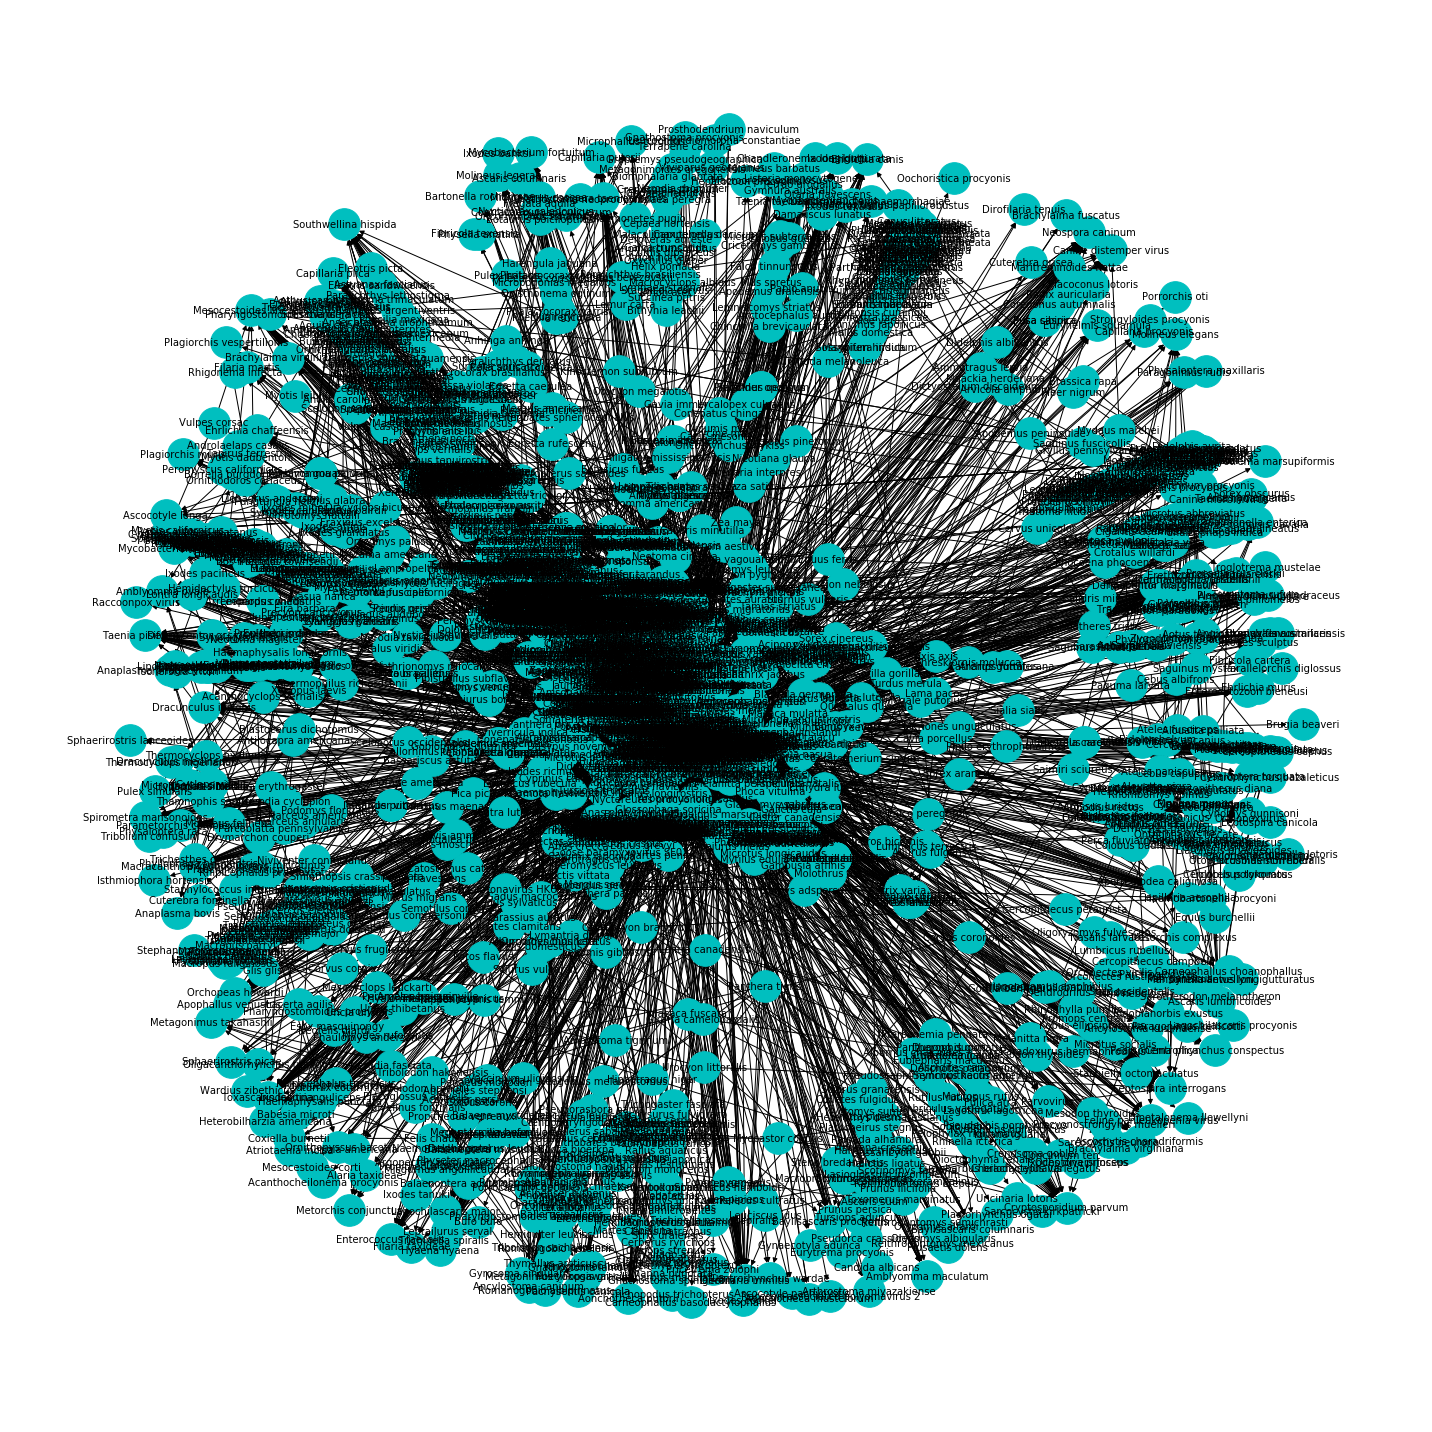

In [232]:
plt.figure(figsize=(20,20))
edge_labels = nx.get_edge_attributes(G,'label')

pos = nx.spring_layout(G) 
#pos = nx.random_layout(G)
#pos = nx.circular_layout(G)
#pos = nx.spectral_layout(G)
#pos = nx.shell_layout(G, scale=2)

#nodeColors = nx.get_node_attributes(G,'color')

#nx.draw_networkx_edge_labels(G,pos, edge_labels = edge_labels, font_size=10, font_color='blue')

#nx.draw_networkx_nodes(G, pos, node_color=nodeColors.values())

nx.draw_networkx(G, pos, with_labels=True, node_size=1000, node_color='c', alpha= 1, arrows=True, 
                    linewidths=1, font_color="black", font_size=10, style = 'dashed')

plt.axis('off')
plt.tight_layout()
plt.show()





## Create a file with all the nodes and their attributes

In [233]:
# Get the source nodes
nodes = cleanInteractDataTaxon.groupby(['sourceTaxonName','sourceTaxonFamilyName']).count()


In [234]:
# Get the target nodes
nodes = nodes.append(cleanInteractDataTaxon.groupby(['targetTaxonName','targetTaxonFamilyName']).count(),sort=True)

In [235]:

nodes = nodes[['sourceTaxonName', 'targetTaxonFamilyName']]
nodes.head()

,,sourceTaxonName,targetTaxonFamilyName
sourceTaxonName,sourceTaxonFamilyName,,
Acanthocheilonema procyonis,Setariidae,NaN,2.0
Aedes taeniorhynchus,Culicidae,NaN,34.0
Agelaius phoeniceus,Icteridae,NaN,23.0
Aix sponsa,Anatidae,NaN,20.0
Alaria taxideae,Diplostomatidae,NaN,3.0


In [236]:
# Change the source and target column names to make the file Gephi friendly
#nodes.rename(columns={'sourceTaxonName':'source','targetTaxonName':'target'}, inplace=True)
nodes.index.names = ['Label', 'Family']



In [237]:
nodes = nodes.reset_index()
nodes.head()

,Label,Family,sourceTaxonName,targetTaxonFamilyName
0,Acanthocheilonema procyonis,Setariidae,NaN,2.0
1,Aedes taeniorhynchus,Culicidae,NaN,34.0
2,Agelaius phoeniceus,Icteridae,NaN,23.0
3,Aix sponsa,Anatidae,NaN,20.0
4,Alaria taxideae,Diplostomatidae,NaN,3.0


In [238]:

nodes.index.names = ['Id']
#nodes.rename(columns={'sourceTaxonName':'Label',
#                      'sourceTaxonFamilyName':'Family'}, 
#                 inplace=True)

In [239]:
filename = taxon+"Nodes.csv"
nodes.to_csv (filename, index = True, header=True) 

## Create a file with all the edges and their attributes

In [240]:
edges = cleanInteractDataTaxon[['sourceTaxonName', 'targetTaxonName', 'interactionTypeName']]


In [241]:
# Add a column to the edges to indicate that these are disrected graphes 
#edges['Type'] = 'directed'
edges.insert(3, 'Type', 'directed')
edges.rename(columns={'sourceTaxonName':'Source',
                      'targetTaxonName':'Target', 
                      'interactionTypeName':'Interaction'},
                 inplace=True)
edges.index.names = ['Id']
edges.head()

,Source,Target,Interaction,Type
Id,,,,
198115,Bubo virginianus,Procyon lotor,eats,directed
209176,Cathartes aura,Procyon lotor,eats,directed
209291,Coragyps atratus,Procyon lotor,eats,directed
214225,Aquila chrysaetos,Procyon lotor,eats,directed
216493,Haliaeetus leucocephalus,Procyon lotor,eats,directed


In [242]:
filename = taxon+"Edges.csv"
edges.to_csv (filename, index = True, header=True) 

In [212]:
edge_labels

{('Oxalis pes-caprae', 'Rediviva rufipes'): 'visitsFlowersOf',
 ('Oxalis pes-caprae', 'Rediviva peringueyi'): 'visitsFlowersOf',
 ('Oxalis pes-caprae', 'Rediviva parva'): 'visitsFlowersOf',
 ('Oxalis pes-caprae', 'Rediviva micheneri'): 'visitsFlowersOf',
 ('Oxalis pes-caprae', 'Rediviva aurata'): 'visitsFlowersOf',
 ('Oxalis pes-caprae', 'Rediviva alonsoae'): 'visitsFlowersOf',
 ('Oxalis pes-caprae', 'Rediviva albifasciata'): 'visitsFlowersOf',
 ('Oxalis pes-caprae', 'Rediviva intermixta'): 'visitsFlowersOf',
 ('Oxalis pes-caprae', 'Apis mellifera'): 'pollinates',
 ('Oxalis pes-caprae', 'Bombus vosnesenskii'): 'visitsFlowersOf',
 ('Oxalis pes-caprae', 'Phelipanche nana'): 'hasHost',
 ('Oxalis pes-caprae', 'Battus philenor'): 'visitsFlowersOf',
 ('Oxalis pes-caprae', 'Anthocharis sara'): 'visitsFlowersOf',
 ('Oxalis pes-caprae', 'Coenonympha tullia'): 'visitsFlowersOf',
 ('Oxalis pes-caprae', 'Toxomerus marginatus'): 'visitsFlowersOf',
 ('Oxalis pes-caprae', 'Bombus melanopygus'): 'visi